In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
from PIL import Image as img
import matplotlib.image as mpimg
import pickle as pkl

In [2]:
import scipy.sparse.linalg

class Eigenvectors():
    
    def __init__(self, X, K):
        
        self.X = X
        self.K = K
        
    def solve(self):
        
        L, V = scipy.sparse.linalg.eigs(self.X, k=self.K)
        return V[:,0:self.K]
    

In [3]:
class Eigendecomposition():
    
    def __init__(self, face, mu, eigenfaces):
        
        self.x = np.ravel(face, 'F')
        self.mu = np.ravel(mu, 'F')
        self.V = eigenfaces
        
    def solve(self):
        
        return np.matmul(np.conj(np.transpose(self.V)),self.x-self.mu)

In [4]:
dictionary = pkl.load(open('lab10data/lab10data.pkl', 'rb'))
faces = dictionary['faces']
mu = dictionary['mu']
sigma = dictionary['sigma']

In [5]:
K = 20

K_eig = Eigenvectors(sigma, K).solve()

print('Is the matrix unitary?', 
      np.allclose(np.eye(K),np.matmul(np.conj(np.transpose(K_eig)),K_eig),rtol=1e-03, atol=1e-03))

Is the matrix unitary? True


In [9]:
face_idx = 20

coef = Eigendecomposition(faces[:,:,face_idx], mu, K_eig).solve()
print('The coefficients of the ', K, ' principal components are:', coef)

The coefficients of the  20  principal components are: [ 1917.20199986+0.j  -106.14949791+0.j  -291.25158972+0.j
 -1034.52646364+0.j  -185.66734993+0.j    -2.94147084+0.j
  -648.8307638 +0.j  -490.77873374+0.j   299.87449754+0.j
  -510.2305514 +0.j   467.52796913+0.j    20.46434852+0.j
  -444.77503753+0.j  -264.55116393+0.j  -191.8209542 +0.j
   245.24374973+0.j  -465.1702159 +0.j   258.76446606+0.j
   503.40083191+0.j    36.73798832+0.j]


In [10]:
class Reconstruction():
    
    def __init__(self, mu, eigenfaces, coefficients):
        
        self.V = eigenfaces
        self.w = coefficients
        self.mu = np.ravel(mu, 'F')
        self.K = eigenfaces.shape[1]
        
    def solve(self):
        
        return np.transpose((np.abs(np.matmul(self.V,self.w) + self.mu)).reshape((92,112)))

In [12]:
recon_obj = Reconstruction(mu, K_eig, coef)
recon_face = recon_obj.solve()

og_face = faces[:,:,face_idx]

image = img.fromarray(og_face.astype(np.uint8), mode='L')
image.show()
image.save("original.png")

recon_image = img.fromarray(recon_face.astype(np.uint8), mode='L')
recon_image.show()
recon_image.save("recon.png")

Populating the interactive namespace from numpy and matplotlib


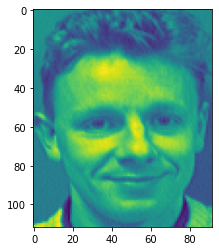

In [25]:
%pylab inline
initial = mpimg.imread('original.png')
imgplot = plt.imshow(initial)
plt.show()

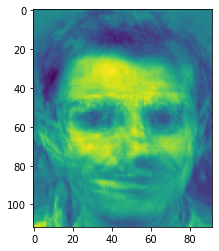

In [26]:
result = mpimg.imread('recon.png')
imgplot2 = plt.imshow(result)

In [16]:
error_energy = np.linalg.norm(og_face-recons_face)*np.linalg.norm(og_face-recons_face)
error_K_0 = np.linalg.norm(og_face-mu)*np.linalg.norm(og_face-mu)
print('Error energy: ', error_energy)
print('Error energy for K = 0: ', error_K_0)
print('Error reduction: ', (error_K_0-error_energy)/error_K_0)

Error energy:  3012337.7251334623
Error energy for K = 0:  10022785.089374999
Error reduction:  0.6994510309986797
